<a href="https://colab.research.google.com/github/chiru30/COMP-6321-Machine-Learning/blob/main/major%20assignment/question%204/q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
!wget "https://github.com/chiru30/COMP-6321-Machine-Learning/blob/main/major%20assignment/question%204/archive.zip"
!unzip "archive.zip"

--2023-10-27 08:07:47--  https://github.com/chiru30/COMP-6321-Machine-Learning/blob/main/major%20assignment/question%204/archive.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5844 (5.7K) [text/plain]
Saving to: ‘archive.zip.8’

archive.zip.8       100%[===================>]   5.71K  --.-KB/s    in 0s      

2023-10-27 08:07:48 (59.2 MB/s) - ‘archive.zip.8’ saved [5844/5844]

Archive:  archive.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of archive.zip or
        archive.zip.zip, and cannot find archive.zip.ZIP, period.


In [3]:
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

data_dir = "/content/archive"

dataset = datasets.ImageFolder(root=data_dir, transform=data_transform)

print(dataset.classes)


['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


In [4]:
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [5]:
batch_size = 50
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [6]:

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 32 * 32, 64)  # Adjust the input size as needed
        self.fc2 = nn.Linear(64, 6)  # Adjust num_classes based on your problem.

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * 32 * 32)  # Adjust the input size as needed
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model
model = SimpleCNN()

# Print the model to see the architecture
print(model)


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=6, bias=True)
)


Epoch 1, Training Loss: 1.741665854340508, Training Accuracy: 24.047619047619047%
Epoch 2, Training Loss: 1.6468738047849565, Training Accuracy: 31.714285714285715%
Epoch 3, Training Loss: 1.509671695175625, Training Accuracy: 63.904761904761905%
Epoch 4, Training Loss: 1.3207179620152427, Training Accuracy: 77.71428571428571%
Epoch 5, Training Loss: 1.0928633503970646, Training Accuracy: 80.61904761904762%
Epoch 6, Training Loss: 0.8615074831814993, Training Accuracy: 81.5%
Epoch 7, Training Loss: 0.6689904168957755, Training Accuracy: 86.69047619047619%
Epoch 8, Training Loss: 0.5385495214944794, Training Accuracy: 91.21428571428571%
Epoch 9, Training Loss: 0.4541098638659432, Training Accuracy: 92.14285714285714%
Epoch 10, Training Loss: 0.398314016915503, Training Accuracy: 93.47619047619048%


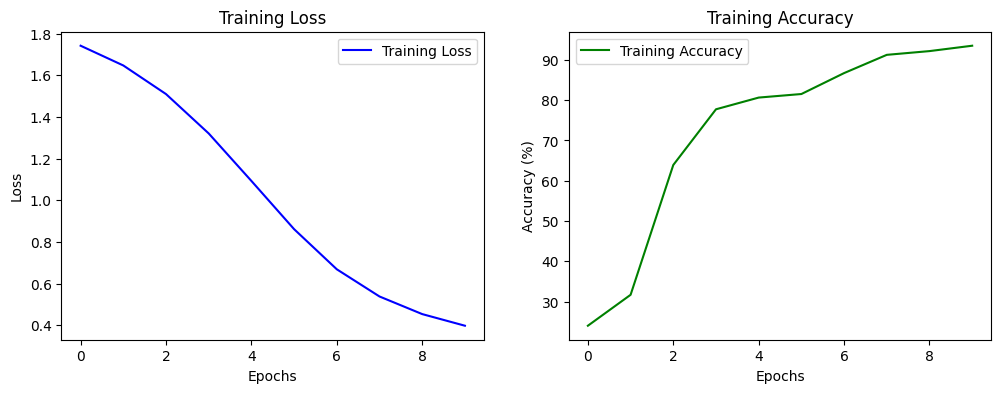

In [8]:
# Lists to store training accuracy and loss
train_loss_values = []
train_accuracy_values = []

# Training loop
num_epochs = 10

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

    train_accuracy = 100 * total_correct / total_samples
    train_loss = running_loss / len(train_loader)

    train_accuracy_values.append(train_accuracy)
    train_loss_values.append(train_loss)

    print(f"Epoch {epoch+1}, Training Loss: {train_loss}, Training Accuracy: {train_accuracy}%")

# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_values, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_values, label='Training Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.show()

In [9]:
model.eval()  # Set the model to evaluation mode

y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

class_names = dataset.classes
target_names = [class_names[i] for i in range(len(class_names))]
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

   AbdomenCT       0.98      0.92      0.95       300
   BreastMRI       0.95      1.00      0.97       307
         CXR       0.99      0.97      0.98       298
     ChestCT       0.91      1.00      0.95       281
        Hand       0.97      0.92      0.94       310
      HeadCT       0.95      0.93      0.94       304

    accuracy                           0.96      1800
   macro avg       0.96      0.96      0.96      1800
weighted avg       0.96      0.96      0.96      1800

